In [1]:
!pip install kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/emotion-dataset")

print("Path to dataset files:", path)



100%|██████████| 715k/715k [00:00<00:00, 29.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/parulpandey/emotion-dataset/versions/1


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d parulpandey/emotion-dataset

Dataset URL: https://www.kaggle.com/datasets/parulpandey/emotion-dataset
License(s): CC0-1.0


In [4]:
from zipfile import ZipFile
file_name ="/content/emotion-dataset.zip"

In [5]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [10]:
# Twitter Emotion Analysis - Multiclass Classification with K-Fold Cross Validation
# Dataset: https://www.kaggle.com/datasets/parulpandey/emotion-dataset
# Using training.csv, test.csv, and validation.csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:


# Load dataset from multiple files
def load_data(train_path="training.csv", test_path="test.csv", val_path="validation.csv"):
    try:
        # Load training, testing and validation files
        train_df = pd.read_csv(train_path)
        test_df = pd.read_csv(test_path)
        val_df = pd.read_csv(val_path)

        print(f"Training set loaded: {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
        print(f"Test set loaded: {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
        print(f"Validation set loaded: {val_df.shape[0]} rows and {val_df.shape[1]} columns.")

        # Check column names to ensure consistency
        print(f"Training columns: {train_df.columns.tolist()}")
        print(f"Test columns: {test_df.columns.tolist()}")
        print(f"Validation columns: {val_df.columns.tolist()}")

        return train_df, test_df, val_df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None, None

Training set loaded: 16000 rows and 2 columns.
Test set loaded: 2000 rows and 2 columns.
Validation set loaded: 2000 rows and 2 columns.
Training columns: ['text', 'label']
Test columns: ['text', 'label']
Validation columns: ['text', 'label']

--- Dataset Overview ---
Combined dataset shape: (20000, 2)

Sample data:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Emotion distribution in training set:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

Emotion distribution in test set:
label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64

Emotion distribution in validation set:
label
1    704
0    550
3    

Fold 1 Validation Accuracy: 0.8997

Fold 2/5


Fold 2 Validation Accuracy: 0.9038

Fold 3/5


Fold 3 Validation Accuracy: 0.9187

Fold 4/5


Fold 4 Validation Accuracy: 0.9006

Fold 5/5


Fold 5 Validation Accuracy: 0.9034

LSTM Mean CV Accuracy: 0.9053 (±0.0069)

--- Training Final LSTM Model ---

Training final LSTM model on full training set...
Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4251 - loss: 1.4577

500/500 ━━━━━━━━━━━━━━━━━━━━ 112s 210ms/step - accuracy: 0.4254 - loss: 1.4571 - val_accuracy: 0.8280 - val_loss: 0.5280
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8809 - loss: 0.3938

500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 206ms/step - accuracy: 0.8810 - loss: 0.3937 - val_accuracy: 0.9090 - val_loss: 0.2755
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9443 - loss: 0.1796

500/500 ━━━━━━━━━━━━━━━━━━━━ 103s 205ms/step - accuracy: 0.9443 - loss: 0.1796 - val_accuracy: 0.9155 - val_loss: 0.2696
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9543 - loss: 0.1361

500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 210ms/step - accuracy: 0.9543 - loss: 0.1361 - val_accuracy: 0.9180 - val_loss: 0.2263
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 205ms/step - accuracy: 0.9712 - loss: 0.0858 - val_accuracy: 0.9130 - val_loss: 0.2750
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.9755 - loss: 0.0726 - val_accuracy: 0.9155 - val_loss: 0.2789
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9776 - loss: 0.0721

500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.9776 - loss: 0.0721 - val_accuracy: 0.9215 - val_loss: 0.2926
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9240 - loss: 0.2151

Final LSTM Model Validation Accuracy: 0.9180
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       550
           1       0.94      0.94      0.94       704
           2       0.86      0.82      0.84       178
           3       0.89      0.95      0.92       275
           4       0.90      0.82      0.86       212
           5       0.77      0.93      0.84        81

    accuracy                           0.92      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.92      0.92      0.92      2000


--- Test Set Evaluation ---
Random Forest Test Accuracy: 0.8735

Classification Report (Random Forest):
              precision    re


--- Model Comparison (Cross-Validation) ---
Random Forest: 0.8671 (±0.0051)
XGBoost: 0.8768 (±0.0043)
BiLSTM: 0.9053 (±0.0069)

--- Model Comparison (Test Set) ---
Random Forest: 0.8735
XGBoost: 0.8805
BiLSTM: 0.9130

Best model on test set: BiLSTM with accuracy 0.9130
Saved BiLSTM model and tokenizer.

--- Prediction Examples ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Text: 'I'm so happy today! Everything is going well!'
Predicted Emotion: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Text: 'This is terrible news, I feel devastated.'
Predicted Emotion: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Text: 'I'm scared about what might happen next.'
Predicted Emotion: 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Text: 'That makes me so angry, I can't believe it.'
Predicted Emotion: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Text: 'I love how you always know what to say!'
Predicted Emotion: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Text: 'Wow! I can't believe what just happened, I'm shocked!'
Predicted Emo

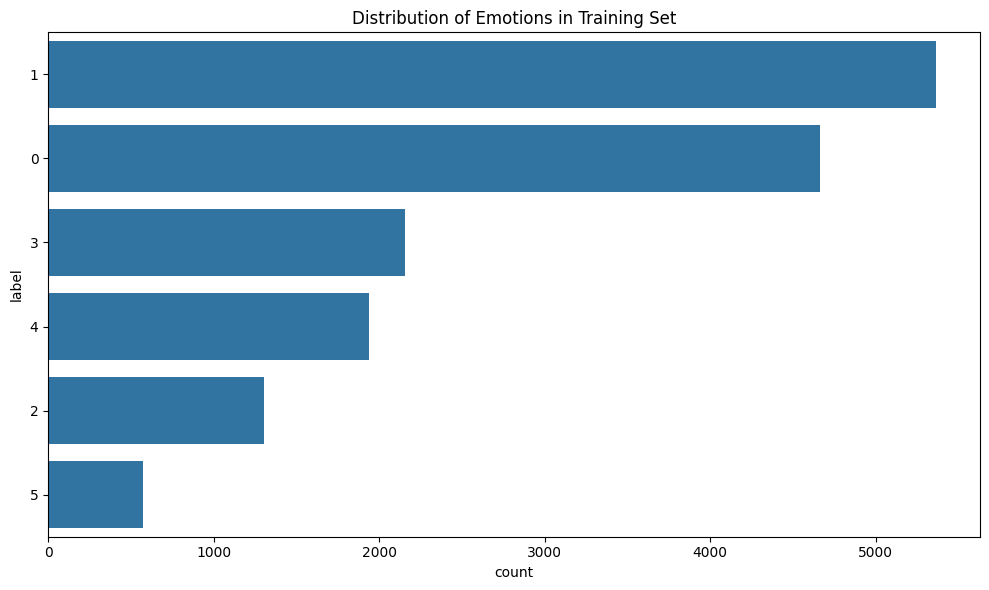

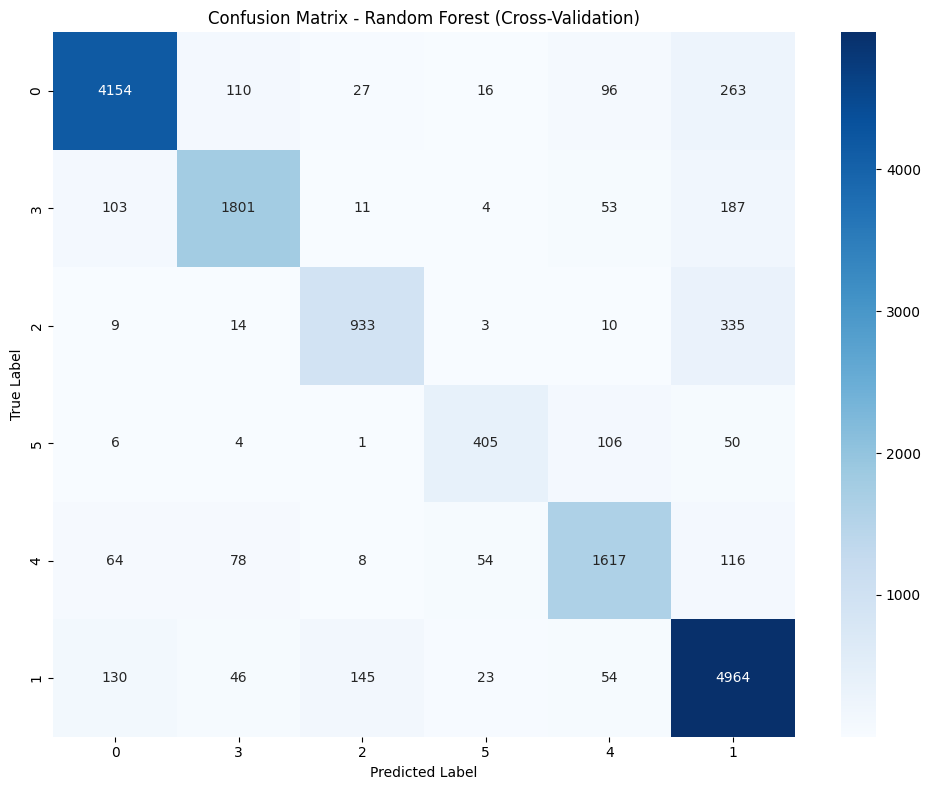

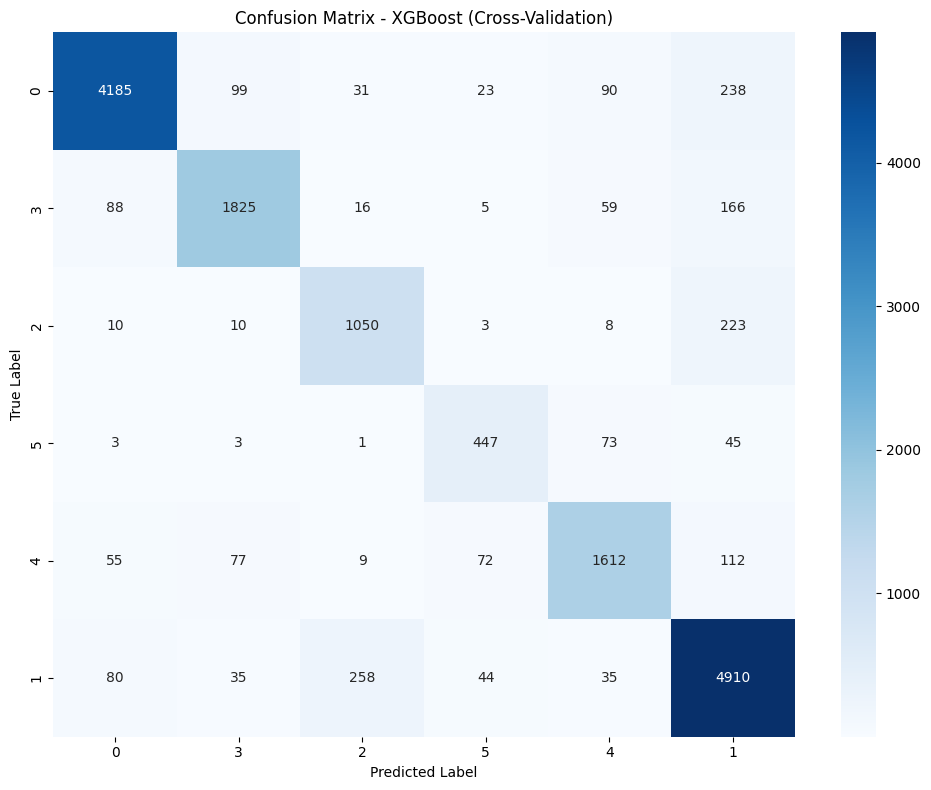

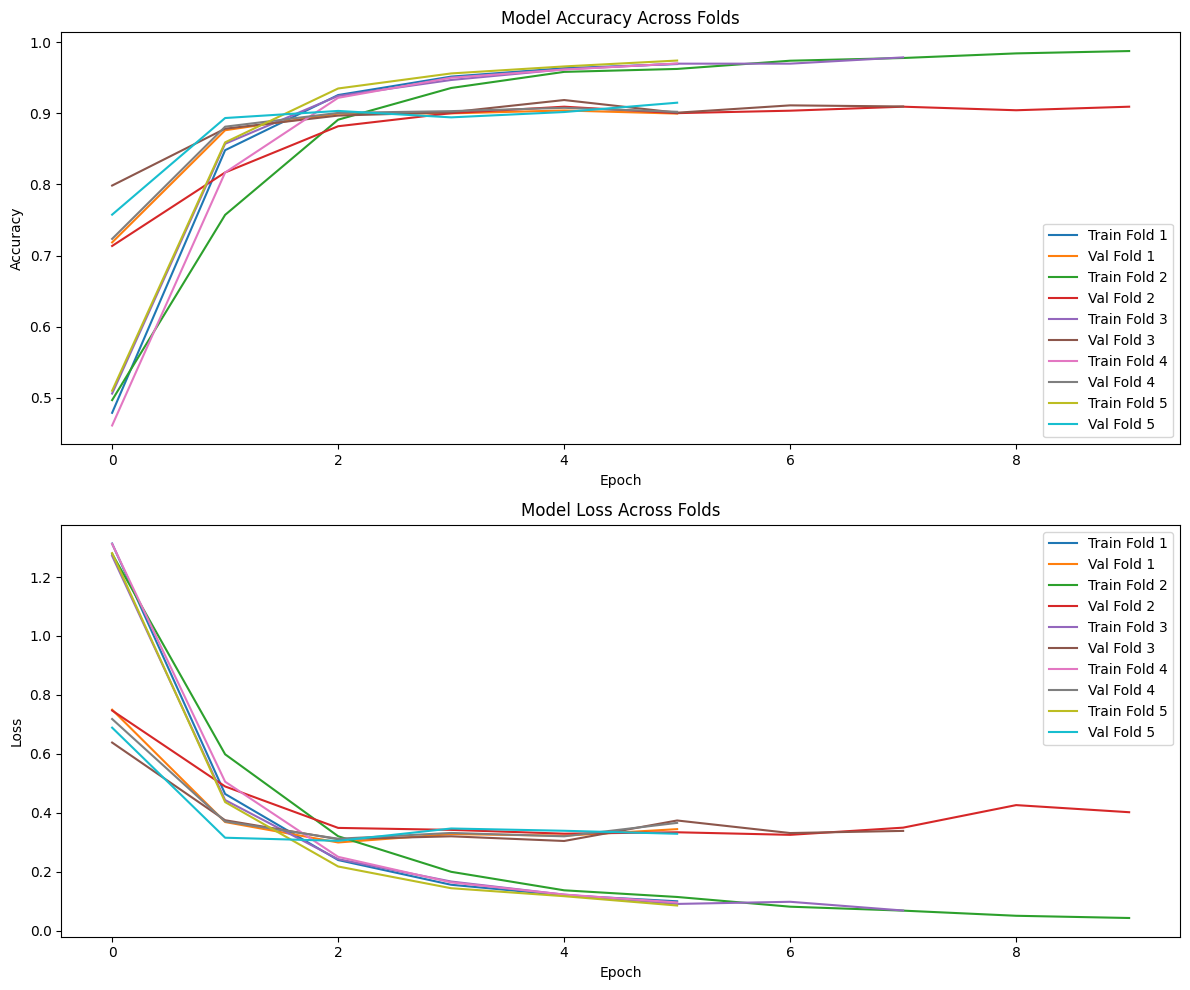

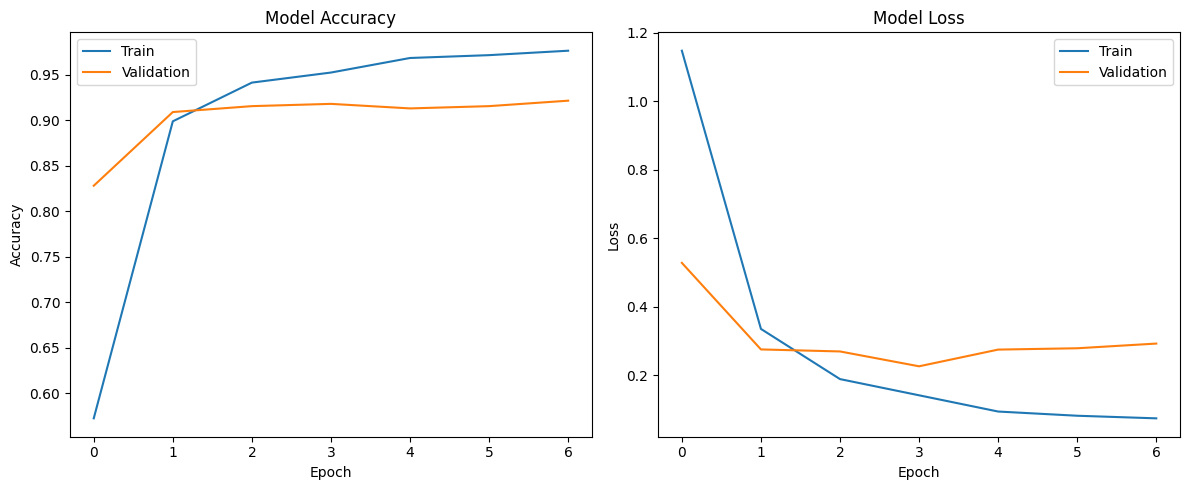

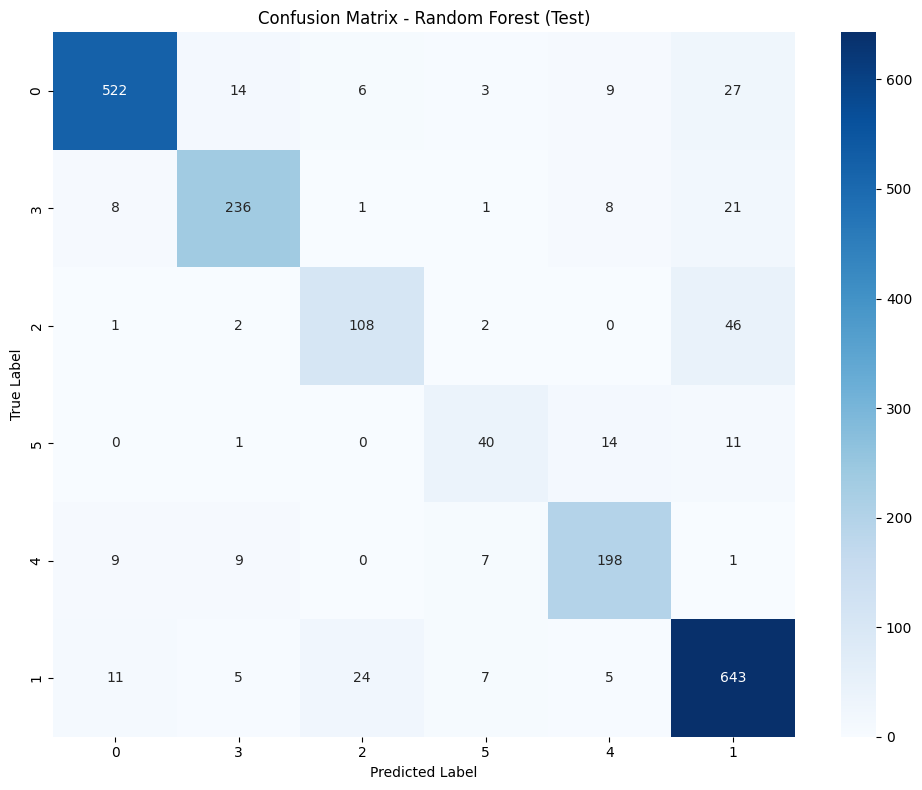

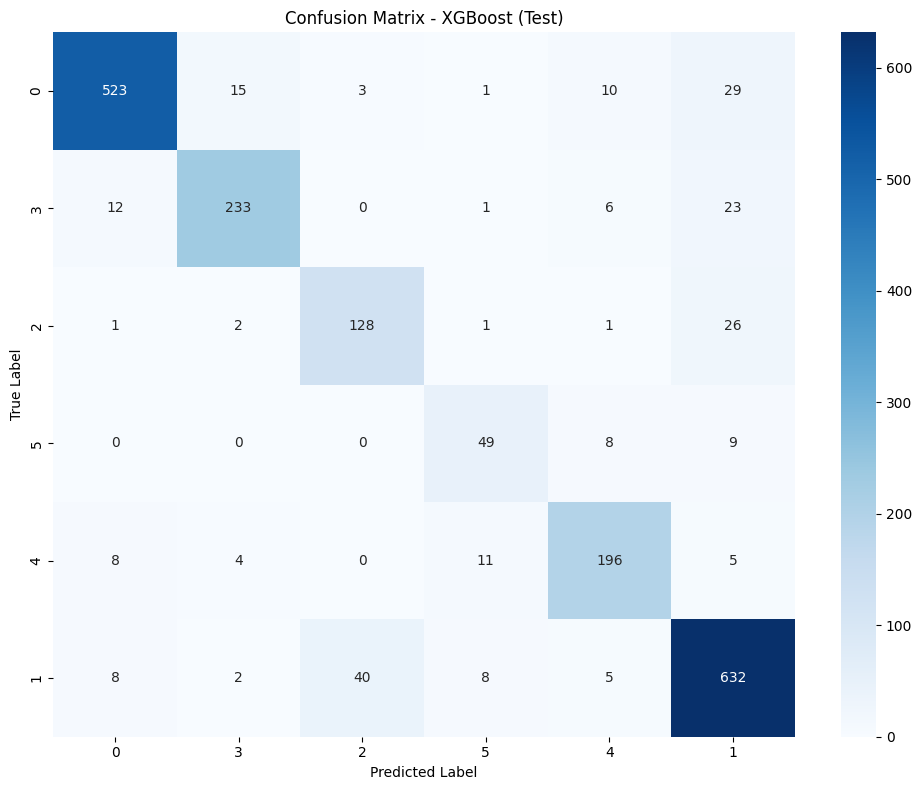

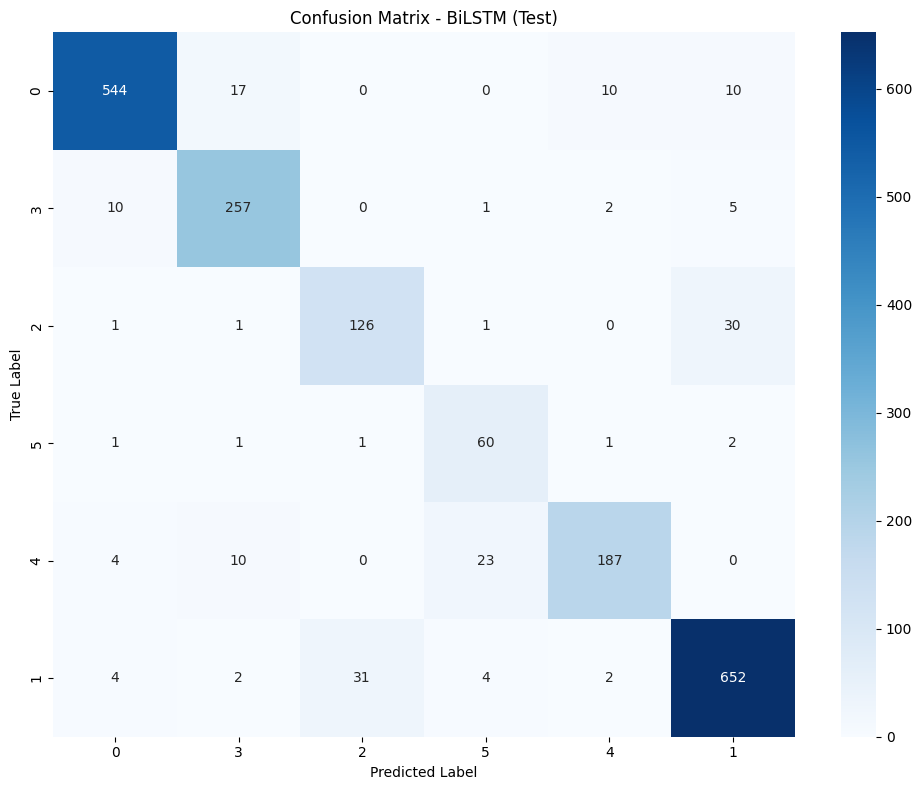

In [14]:


# Data Exploration
def explore_data(train_df, test_df, val_df):
    # Combine for overall statistics
    full_df = pd.concat([train_df, test_df, val_df])

    print("\n--- Dataset Overview ---")
    print(f"Combined dataset shape: {full_df.shape}")
    print("\nSample data:")
    print(train_df.head())

    # Assuming 'label' or 'emotion' column exists for emotions
    # Adjust column name as needed based on actual dataset
    label_col = 'label' if 'label' in train_df.columns else 'emotion'

    print(f"\nEmotion distribution in training set:")
    emotion_counts_train = train_df[label_col].value_counts()
    print(emotion_counts_train)

    print(f"\nEmotion distribution in test set:")
    emotion_counts_test = test_df[label_col].value_counts()
    print(emotion_counts_test)

    print(f"\nEmotion distribution in validation set:")
    emotion_counts_val = val_df[label_col].value_counts()
    print(emotion_counts_val)

    # Plot emotion distribution for training set
    plt.figure(figsize=(10, 6))
    sns.countplot(y=label_col, data=train_df, order=emotion_counts_train.index)
    plt.title('Distribution of Emotions in Training Set')
    plt.tight_layout()
    plt.savefig('emotion_distribution_train.png')

    # Determine text column (assuming 'text' or 'content')
    text_col = 'text' if 'text' in train_df.columns else 'content'

    # Basic text statistics
    train_df['text_length'] = train_df[text_col].apply(len)
    train_df['word_count'] = train_df[text_col].apply(lambda x: len(str(x).split()))

    print("\nText statistics in training set:")
    print(train_df[['text_length', 'word_count']].describe())

    # Define label mapping from emotion names to numeric indices
    unique_emotions = full_df[label_col].unique()
    label_mapping = {emotion: idx for idx, emotion in enumerate(unique_emotions)}

    return label_mapping, text_col, label_col

# Text Preprocessing (Without Stemming)
def clean_text(text):
    """Clean and preprocess text without stemming"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove user mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)

        # Remove non-alphanumeric characters
        text = re.sub(r'[^\w\s]', '', text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        # Optional: Remove stopwords
        # stop_words = set(stopwords.words('english'))
        # text = ' '.join([word for word in text.split() if word not in stop_words])

        return text
    return ""

# Prepare data for machine learning
def prepare_data(train_df, test_df, val_df, label_mapping, text_col, label_col):
    print("Cleaning text data...")

    # Clean text in all datasets
    train_df['cleaned_text'] = train_df[text_col].apply(clean_text)
    test_df['cleaned_text'] = test_df[text_col].apply(clean_text)
    val_df['cleaned_text'] = val_df[text_col].apply(clean_text)

    # Map emotion labels to numeric indices
    train_df['emotion_label'] = train_df[label_col].map(label_mapping)
    test_df['emotion_label'] = test_df[label_col].map(label_mapping)
    val_df['emotion_label'] = val_df[label_col].map(label_mapping)

    # Extract features and labels
    X_train = train_df['cleaned_text']
    y_train = train_df['emotion_label']

    X_test = test_df['cleaned_text']
    y_test = test_df['emotion_label']

    X_val = val_df['cleaned_text']
    y_val = val_df['emotion_label']

    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")

    return X_train, y_train, X_test, y_test, X_val, y_val

# Traditional ML Models with K-fold Cross Validation
def train_traditional_models_with_kfold(X_train, y_train, label_mapping, n_splits=5):
    # Create TF-IDF vectors
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }

    results = {}

    # Set up K-fold cross validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"\nTraining {model_name} with {n_splits}-fold cross validation...")

        # Calculate cross validation scores
        cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=kf, scoring='accuracy')

        print(f"{model_name} CV Scores: {cv_scores}")
        print(f"{model_name} Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

        # Get predictions for confusion matrix and classification report
        y_pred = cross_val_predict(model, X_train_tfidf, y_train, cv=kf)

        # Classification report
        reverse_mapping = {v: k for k, v in label_mapping.items()}
        y_true_labels = [reverse_mapping[label] for label in y_train]
        y_pred_labels = [reverse_mapping[label] for label in y_pred]

        print("\nClassification Report:")
        print(classification_report(y_true_labels, y_pred_labels))

        # Confusion Matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_train, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_mapping.keys(),
                    yticklabels=label_mapping.keys())
        plt.title(f'Confusion Matrix - {model_name} (Cross-Validation)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}_cv.png')

        # Store results
        results[model_name] = {
            'cv_scores': cv_scores,
            'mean_accuracy': cv_scores.mean(),
            'std_accuracy': cv_scores.std()
        }

        # Train final model on full dataset
        model.fit(X_train_tfidf, y_train)

    return results, tfidf_vectorizer, models

# Function to create and train a deep learning model for a fold
def build_fold_model(X_train_fold, y_train_fold, X_val_fold, y_val_fold, num_classes, max_len=100):
    # Tokenize text
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(X_train_fold)

    X_train_seq = tokenizer.texts_to_sequences(X_train_fold)
    X_val_seq = tokenizer.texts_to_sequences(X_val_fold)

    # Pad sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
    X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

    # Convert to one-hot encoding
    y_train_cat = tf.keras.utils.to_categorical(y_train_fold, num_classes)
    y_val_cat = tf.keras.utils.to_categorical(y_val_fold, num_classes)

    # Build LSTM model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Early stopping and model checkpoint
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint(
            filepath=f'model_fold.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]

    # Train model
    history = model.fit(
        X_train_pad,
        y_train_cat,
        epochs=10,
        batch_size=32,
        validation_data=(X_val_pad, y_val_cat),
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate model
    val_loss, val_accuracy = model.evaluate(X_val_pad, y_val_cat, verbose=0)

    return val_accuracy, model, tokenizer, history

# Deep Learning Model with K-fold Cross Validation
def build_lstm_model_with_kfold(X_train, y_train, label_mapping, n_splits=5):
    print("\nBuilding LSTM model with K-fold cross validation...")

    # Set up K-fold cross validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold_accuracies = []
    fold_histories = []
    best_accuracy = 0
    best_model = None
    best_tokenizer = None

    # Number of classes
    num_classes = len(label_mapping)

    # K-fold cross validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        print(f"\nFold {fold + 1}/{n_splits}")

        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]

        # Build and train model for this fold
        val_accuracy, model, tokenizer, history = build_fold_model(
            X_train_fold, y_train_fold, X_val_fold, y_val_fold, num_classes
        )

        print(f"Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}")

        # Save fold results
        fold_accuracies.append(val_accuracy)
        fold_histories.append(history)

        # Check if this is the best model so far
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model
            best_tokenizer = tokenizer

    # Print summary of K-fold results
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"\nLSTM Mean CV Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")

    # Plot training history for the best model
    plot_fold_histories(fold_histories)

    return best_model, best_tokenizer, mean_accuracy, std_accuracy

# Function to plot training histories from all folds
def plot_fold_histories(histories):
    plt.figure(figsize=(12, 10))

    # Plot training & validation accuracy values
    plt.subplot(2, 1, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
        plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

    plt.title('Model Accuracy Across Folds')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(2, 1, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
        plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')

    plt.title('Model Loss Across Folds')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.savefig('lstm_kfold_training_history.png')

# Train LSTM model on the full training set and evaluate on validation set
def train_final_lstm_model(X_train, y_train, X_val, y_val, label_mapping):
    print("\nTraining final LSTM model on full training set...")

    # Number of classes
    num_classes = len(label_mapping)
    max_len = 100

    # Tokenize text
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_val_seq = tokenizer.texts_to_sequences(X_val)

    # Pad sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
    X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

    # Convert to one-hot encoding
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
    y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)

    # Build LSTM model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Early stopping and model checkpoint
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint(
            filepath='final_lstm_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]

    # Train model
    history = model.fit(
        X_train_pad,
        y_train_cat,
        epochs=15,
        batch_size=32,
        validation_data=(X_val_pad, y_val_cat),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate model
    val_loss, val_accuracy = model.evaluate(X_val_pad, y_val_cat)
    print(f"\nFinal LSTM Model Validation Accuracy: {val_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.savefig('final_lstm_training_history.png')

    # Classification report on validation set
    y_val_pred_probs = model.predict(X_val_pad)
    y_val_pred = np.argmax(y_val_pred_probs, axis=1)

    reverse_mapping = {v: k for k, v in label_mapping.items()}
    y_val_true_labels = [reverse_mapping[label] for label in y_val]
    y_val_pred_labels = [reverse_mapping[label] for label in y_val_pred]

    print("\nClassification Report on Validation Set:")
    print(classification_report(y_val_true_labels, y_val_pred_labels))

    return model, tokenizer, val_accuracy

# Test all models on the test set
def evaluate_on_test_set(X_test, y_test, ml_models, tfidf_vectorizer, lstm_model, tokenizer, label_mapping):
    print("\n--- Test Set Evaluation ---")

    # Prepare test data for traditional ML models
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Prepare test data for LSTM
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    max_len = 100
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
    num_classes = len(label_mapping)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

    # Evaluate traditional ML models
    test_results = {}
    for model_name, model in ml_models.items():
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        test_results[model_name] = accuracy
        print(f"{model_name} Test Accuracy: {accuracy:.4f}")

        # Classification report
        reverse_mapping = {v: k for k, v in label_mapping.items()}
        y_test_labels = [reverse_mapping[label] for label in y_test]
        y_pred_labels = [reverse_mapping[label] for label in y_pred]

        print(f"\nClassification Report ({model_name}):")
        print(classification_report(y_test_labels, y_pred_labels))

        # Confusion Matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_mapping.keys(),
                    yticklabels=label_mapping.keys())
        plt.title(f'Confusion Matrix - {model_name} (Test)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}_test.png')

    # Evaluate LSTM model
    lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test_cat)
    test_results['BiLSTM'] = lstm_accuracy
    print(f"BiLSTM Test Accuracy: {lstm_accuracy:.4f}")

    # LSTM classification report
    y_pred_probs = lstm_model.predict(X_test_pad)
    y_pred = np.argmax(y_pred_probs, axis=1)

    reverse_mapping = {v: k for k, v in label_mapping.items()}
    y_test_labels = [reverse_mapping[label] for label in y_test]
    y_pred_labels = [reverse_mapping[label] for label in y_pred]

    print("\nClassification Report (BiLSTM):")
    print(classification_report(y_test_labels, y_pred_labels))

    # Confusion Matrix for LSTM
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_mapping.keys(),
                yticklabels=label_mapping.keys())
    plt.title('Confusion Matrix - BiLSTM (Test)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_bilstm_test.png')

    return test_results

# Main execution function
def main():
    # Number of folds for cross-validation
    n_splits = 5

    # Load data - adjust file paths as needed based on your dataset
    train_df, test_df, val_df = load_data(
        train_path="training.csv",
        test_path="test.csv",
        val_path="validation.csv"
    )

    if train_df is None or test_df is None or val_df is None:
        print("Error loading datasets. Please check file paths.")
        return

    # Explore data
    label_mapping, text_col, label_col = explore_data(train_df, test_df, val_df)

    # Prepare data
    X_train, y_train, X_test, y_test, X_val, y_val = prepare_data(
        train_df, test_df, val_df, label_mapping, text_col, label_col
    )

    # Train traditional ML models with k-fold cross validation on training set
    print("\n--- Training Traditional ML Models with K-Fold Cross Validation ---")
    ml_cv_results, tfidf_vectorizer, ml_models = train_traditional_models_with_kfold(
        X_train, y_train, label_mapping, n_splits
    )

    # Train LSTM model with k-fold cross validation on training set
    print("\n--- Training LSTM Model with K-Fold Cross Validation ---")
    lstm_cv_model, lstm_cv_tokenizer, lstm_mean_accuracy, lstm_std_accuracy = build_lstm_model_with_kfold(
        X_train, y_train, label_mapping, n_splits
    )

    # Train final LSTM model using the entire training set and validate on validation set
    print("\n--- Training Final LSTM Model ---")
    lstm_model, lstm_tokenizer, lstm_val_accuracy = train_final_lstm_model(
        X_train, y_train, X_val, y_val, label_mapping
    )

    # Evaluate all models on the test set
    test_results = evaluate_on_test_set(
        X_test, y_test, ml_models, tfidf_vectorizer, lstm_model, lstm_tokenizer, label_mapping
    )

    # Compare model performances
    print("\n--- Model Comparison (Cross-Validation) ---")
    for model_name, results in ml_cv_results.items():
        print(f"{model_name}: {results['mean_accuracy']:.4f} (±{results['std_accuracy']:.4f})")
    print(f"BiLSTM: {lstm_mean_accuracy:.4f} (±{lstm_std_accuracy:.4f})")

    print("\n--- Model Comparison (Test Set) ---")
    for model_name, accuracy in test_results.items():
        print(f"{model_name}: {accuracy:.4f}")

    best_model = max(test_results.items(), key=lambda x: x[1])
    print(f"\nBest model on test set: {best_model[0]} with accuracy {best_model[1]:.4f}")

    # Saving the best model and all artifacts
    if best_model[0] == 'BiLSTM':
        # Save LSTM model
        lstm_model.save('best_model_lstm.h5')
        # Save tokenizer
        import pickle
        with open('tokenizer.pickle', 'wb') as handle:
            pickle.dump(lstm_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Saved BiLSTM model and tokenizer.")
    else:
        # Save best traditional ML model
        import joblib
        best_ml_model = ml_models[best_model[0]]
        joblib.dump(best_ml_model, f'best_model_{best_model[0].lower().replace(" ", "_")}.joblib')
        joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
        print(f"Saved {best_model[0]} model and TF-IDF vectorizer.")

    # Create function for making predictions with the best model
    def predict_emotion(text, model_name=best_model[0]):
        cleaned = clean_text(text)

        if model_name == 'BiLSTM':
            # Use LSTM model
            sequence = lstm_tokenizer.texts_to_sequences([cleaned])
            padded = pad_sequences(sequence, maxlen=100, padding='post')
            prediction = lstm_model.predict(padded)[0]
            pred_class = np.argmax(prediction)
        else:
            # Use traditional ML model
            tfidf = tfidf_vectorizer.transform([cleaned])
            pred_class = ml_models[model_name].predict(tfidf)[0]

        reverse_mapping = {v: k for k, v in label_mapping.items()}
        return reverse_mapping[pred_class]

    # Test the prediction function
    test_texts = [
        "I'm so happy today! Everything is going well!",
        "This is terrible news, I feel devastated.",
        "I'm scared about what might happen next.",
        "That makes me so angry, I can't believe it.",
        "I love how you always know what to say!",
        "Wow! I can't believe what just happened, I'm shocked!"
    ]

    print("\n--- Prediction Examples ---")
    for text in test_texts:
        emotion = predict_emotion(text)
        print(f"Text: '{text}'")
        print(f"Predicted Emotion: {emotion}\n")

if __name__ == "__main__":
    main()